In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.grid_search import GridSearchCV
%matplotlib inline

### Step 1 : 데이터 불러오기

In [122]:
data = pd.read_csv('Default_Clients_Train.csv')

In [123]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2309,30000,1,2,2,25,0,0,0,0,...,12580,13716,14828,1500,2000,1500,1500,1500,2000,0
1,22405,150000,2,1,2,26,0,0,0,0,...,101581,77741,77264,4486,4235,3161,2647,2669,2669,0
2,23398,70000,2,3,1,32,0,0,0,0,...,69753,70111,70212,2431,3112,3000,2438,2500,2554,0
3,25059,130000,1,3,2,49,0,0,0,0,...,16898,11236,6944,1610,1808,7014,27,7011,4408,0
4,2665,50000,2,2,2,36,0,0,0,0,...,19574,20295,19439,2000,1500,1000,1800,0,1000,1


In [4]:
data.shape

(24000, 25)

In [124]:
# default payment next month 라는 column 이름을 default로 바꿈
data = data.rename(columns={ 'default payment next month' : 'default'})

In [46]:
data_test = data_test.rename(columns={ 'default payment next month' : 'default'})

### Baseline Model

아무 Feature Engineering 없이 RandomForest Model 을 활용

In [6]:
df = data.drop('ID', axis = 1) # ID 열을 제거
df = pd.get_dummies(df, columns=['SEX','EDUCATION','MARRIAGE'], drop_first = True) # Gender, Education, Martial status -> dummy 변수
X = np.array(df.drop('default', axis = 1))
y = np.array(df['default'])

In [7]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
?RandomForestClassifier 
# 패키지에 관한 설

In [ ]:
?metrics.f1_score

In [8]:
%%time
# 10-fold cross validation 을 통해 최적의 n_estimators를 찾으시오 (10, 50, 100, 150, 200 중)
from sklearn.linear_model import LinearRegression
kf = KFold(X.shape[0], n_folds=10, random_state=42)

##code here
f1_mean = []
for i in [10,20,30]:
   f1_score = []
   for train_idx, test_idx in kf:
       X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
       clf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
       clf.fit(X_train, y_train)
       f1_score.append(metrics.f1_score(y_test, clf.predict(X_test)))
   f1_mean.append(f1_score)

CPU times: user 1min 5s, sys: 228 ms, total: 1min 5s
Wall time: 24 s


In [9]:
f1_mean

[[0.42802547770700633,
  0.43966547192353644,
  0.39466666666666667,
  0.43498817966903075,
  0.44864226682408498,
  0.43126684636118606,
  0.43167305236270753,
  0.40694789081885852,
  0.45549132947976878,
  0.43095238095238092],
 [0.45679012345679015,
  0.44522968197879864,
  0.41787122207621546,
  0.44705882352941179,
  0.47276940903823872,
  0.49282920469361152,
  0.47420147420147424,
  0.43414634146341458,
  0.48797250859106533,
  0.48118586088939558],
 [0.47394540942928032,
  0.47795823665893278,
  0.39892183288409711,
  0.47113163972286382,
  0.48498845265588908,
  0.47167325428194995,
  0.47911547911547908,
  0.41749999999999998,
  0.48471121177802939,
  0.48139534883720925]]

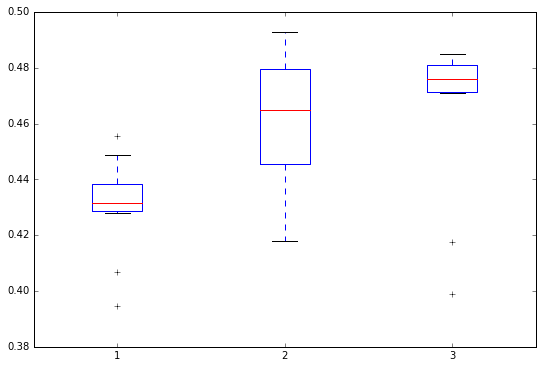

In [10]:
# Create a figure instance
fig = plt.figure(figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(f1_mean)
# ax.set_xticklabels(est_lst)

### Step 1 : 데이터 탐색(Exploratory Data Analysis)

In [11]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [12]:
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167381.403333,35.491208,-0.024083,-0.139917,-0.168583,-0.221250,-0.266500,-0.291000,51210.870458,49089.304625,...,0.602667,0.352542,0.467208,0.164917,0.003917,0.009333,0.001583,0.451792,0.535500,0.010833
std,129712.749183,9.220582,1.118059,1.191490,1.200058,1.174424,1.138031,1.153419,73789.171737,71304.728460,...,0.489356,0.477771,0.498934,0.371113,0.062462,0.096159,0.039760,0.497681,0.498749,0.103520
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-15308.000000,-33350.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3593.500000,2999.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22324.000000,21129.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67012.750000,63832.250000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Grouping
grouped = data['default'].groupby(data['MARRIAGE'])

In [14]:
grouped.mean()

MARRIAGE
0    0.088889
1    0.234437
2    0.209384
3    0.261538
Name: default, dtype: float64

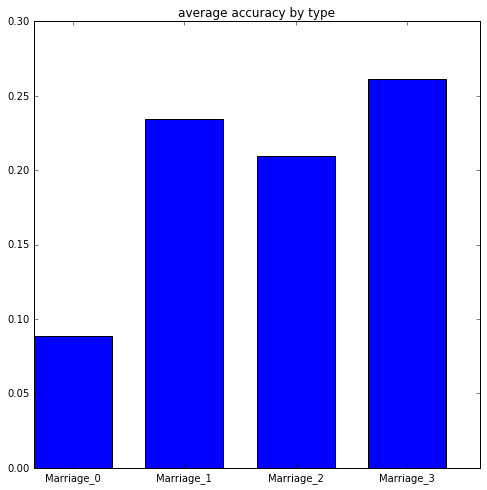

In [15]:
# 결혼 여부에 따른 deafult 여부
plt.rcParams['figure.figsize'] = (8, 8)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b') #각 값의 위치, 해당 위치의 값, 폭, 색깔
ax.set_xticks(xLocations + 0.5*barWidth)
ax.set_xticklabels(('Marriage_0', 'Marriage_1', 'Marriage_2','Marriage_3'))
plt.title('average accuracy by type')

In [16]:
#Education에 따른 defalut 비율을 계산하시오

##code here:
grouped = data['default'].groupby(data['EDUCATION'])
grouped.mean()




EDUCATION
0    0.000000
1    0.194067
2    0.236065
3    0.249874
4    0.053191
5    0.066964
6    0.184211
Name: default, dtype: float64

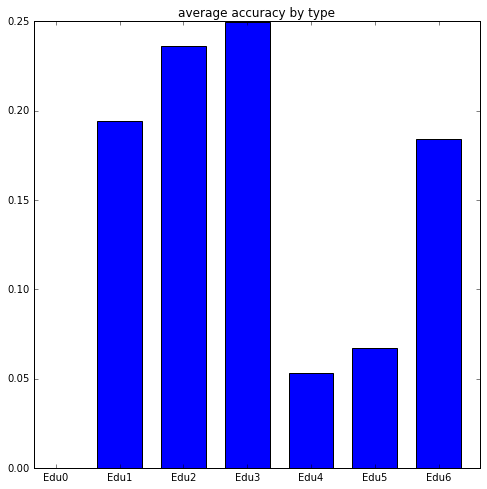

In [17]:
plt.rcParams['figure.figsize'] = (8, 8)

accuracyVec = np.array(grouped.mean())

barWidth = 0.7
xLocations = np.arange(len(accuracyVec))

fig, ax = plt.subplots()

ax.bar(xLocations, accuracyVec, barWidth, color='b')
ax.set_xticks(xLocations+0.5*barWidth)
ax.set_xticklabels(('Edu0', 'Edu1', 'Edu2','Edu3','Edu4','Edu5','Edu6'))
plt.title('average accuracy by type')

##### default인 사람과 그렇지 않은 사람들의 집단 비교

In [18]:
mean_df = data.groupby('default').mean()

In [19]:
mean_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default,,,,,,,,,,,,,,,,,,,,,
0,15002.345279,177734.474458,1.613319,1.842471,1.561861,35.421878,-0.218989,-0.306873,-0.319551,-0.356994,...,47509.627761,43688.595667,40656.249104,39092.847232,6272.025194,6540.071302,5840.686654,5343.864242,5258.579567,5746.244932
1,14678.580396,130896.829406,1.565127,1.892554,1.532139,35.735533,0.662771,0.448445,0.363431,0.257116,...,44552.223563,41538.328558,38985.510273,37762.871631,3372.748916,3308.808860,3373.902356,3145.779830,3272.702545,3380.963808


In [20]:
mean_df['PAY_AMT5']

default
0    5258.579567
1    3272.702545
Name: PAY_AMT5, dtype: float64

### Step 3 : Feature Engineering

In [125]:
#1) marriage  값이 0이면 1, 아니면 0
data['MARRIAGE_zero'] = data['MARRIAGE'].map(lambda x: 1 if x == 0 else 0)##code here

In [126]:
#education이 0이면 1 아니면 0
data['EDU_zero'] = data['EDUCATION'].map(lambda x: 1 if x == 0 else 0)##code here

In [127]:
#2) PAY_AMT 의 최근 3개월 합
data['PAY_AMT_sum'] = data['PAY_AMT6'] + data['PAY_AMT5'] + data['PAY_AMT4']

In [128]:
df = data.drop('ID', axis = 1) # ID 열을 제거
df = pd.get_dummies(df, columns=['SEX','EDUCATION','MARRIAGE'], drop_first = True) # Gender, Education, Martial status -> dummy 변수

### Step 4 : Feature Selection

In [129]:
#(생략)
data['PAY_0_SQUARE'] =data['PAY_0'].map(lambda x: x**2)
data['PAY_2_SQUARE'] =data['PAY_2'].map(lambda x: x**2)
data['PAY_3_SQUARE'] =data['PAY_3'].map(lambda x: x**2)
data['PAY_4_SQUARE'] =data['PAY_4'].map(lambda x: x**2)
data['PAY_5_SQUARE'] =data['PAY_5'].map(lambda x: x**2)
data['PAY_6_SQUARE'] =data['PAY_6'].map(lambda x: x**2)

data['PAY_AMT_sum_square'] =data['PAY_AMT_sum'].map(lambda x: x**2) 

In [130]:
df = data.drop('ID', axis = 1) # ID 열을 제거
df = pd.get_dummies(df, columns=['SEX','EDUCATION','MARRIAGE'], drop_first = True) # Gender, Education, Martial status -> dummy 변수
X1 = np.array(df.drop('default', axis = 1))
y1 = np.array(df['default'])

In [131]:
X1.shape

(24000, 40)

### Step 5 : Model Selection

##### Step5 1) # Hyper parameter tuning

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
%%time
rf_grid = GridSearchCV(
    estimator = RandomForestClassifier(random_state=42),
    param_grid = {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = 5, #시간 절약을 위해
    scoring = 'f1', #f1 score를 기준으로
    n_jobs = -1)

rf_grid.fit(X1, y1)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.478569013218
{'n_estimators': 200, 'max_features': 'sqrt'}
CPU times: user 13.9 s, sys: 92 ms, total: 14 s
Wall time: 1min 29s


In [96]:
%%time

#Logistic Regression의 penalty('l1', 'l2'), C(0.01, 1, 10, 100) 에 대해서 grid search

##code here
lr_grid = GridSearchCV(estimator = LogisticRegression(), param_grid = {'penalty' : ['l1', 'l2'], 'C' : [0.01, 1, 10, 100]}, cv = 5, scoring = 'f1', n_jobs = -1)

lr_grid.fit(X1, y1)









print(lr_grid.best_score_)
print(lr_grid.best_params_)

0.36681677874
{'C': 100, 'penalty': 'l1'}
CPU times: user 1.39 s, sys: 108 ms, total: 1.5 s
Wall time: 18.9 s


## Ensemble Models (Voting)

In [99]:
clf1 = LogisticRegression(penalty='l1',C=10, random_state=1, n_jobs=-1)
clf2 = RandomForestClassifier(random_state=1, n_jobs=-1, n_estimators=200)
clf3 = GaussianNB()

kf = KFold(X1.shape[0], n_folds=10, random_state=42)

f1 = []
for train_idx, test_idx in kf:
    X_train, X_test, y_train, y_test = X1[train_idx], X1[test_idx], y1[train_idx], y1[test_idx]
    eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1,1,1])
    eclf.fit(X_train, y_train)
    f1_score = metrics.f1_score(y_test, eclf.predict(X_test))
    f1.append(f1_score)
print('F1_mean : %s, F1_std : %s' %(np.mean(f1), np.std(f1)))

F1_mean : 0.519325539993, F1_std : 0.0227433779883


#### 그리고 최종 모델은 전체 데이터를 모두 활용한다

In [132]:
ensemble = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1,1,1])

In [133]:
X1.shape

(24000, 40)

In [134]:
ensemble.fit(X1, y1)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFore...,
            oob_score=False, random_state=1, verbose=0, warm_start=False)), ('gnb', GaussianNB())],
         voting='soft', weights=[1, 1, 1])

# -----------------------------------------------------

## 최종 주어진 데이터셋으로 예측

In [135]:
data_test = pd.read_csv('Default_Clients_Test.csv')
# data_test = data_test.rename(columns={ 'default payment next month' : 'default'})
data_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
1,12,260000,2,1,2,51,-1,-1,-1,-1,...,9966,8517,22287,13668,21818,9966,8583,22301,0,3640
2,14,70000,1,2,2,30,1,2,2,0,...,65701,66782,36137,36894,3200,0,3000,3000,1500,0
3,17,20000,1,1,2,24,0,0,2,2,...,17428,18338,17905,19104,3200,0,1500,0,1650,0
4,25,90000,1,1,2,23,0,0,0,-1,...,0,5398,6360,8292,5757,0,5398,1200,2045,2000


In [136]:
#train data에 대해 적용한 feature engineering을 동일하게 적용
##code here
data_test['MARRIAGE_zero'] = data_test['MARRIAGE'].map(lambda x: 1 if x == 0 else 0)
data_test['EDU_zero'] = data_test['EDUCATION'].map(lambda x: 1 if x == 0 else 0)
data_test['PAY_AMT_sum'] = data_test['PAY_AMT6'] + data_test['PAY_AMT5'] + data_test['PAY_AMT4']

data_test['PAY_0_SQUARE'] =data_test['PAY_0'].map(lambda x: x**2)
data_test['PAY_2_SQUARE'] =data_test['PAY_2'].map(lambda x: x**2)
data_test['PAY_3_SQUARE'] =data_test['PAY_3'].map(lambda x: x**2)
data_test['PAY_4_SQUARE'] =data_test['PAY_4'].map(lambda x: x**2)
data_test['PAY_5_SQUARE'] =data_test['PAY_5'].map(lambda x: x**2)
data_test['PAY_6_SQUARE'] =data_test['PAY_6'].map(lambda x: x**2)

data_test['PAY_AMT_sum_square'] =data_test['PAY_AMT_sum'].map(lambda x: x**2)

df1 = data_test.drop('ID', axis = 1)
df1 = pd.get_dummies(df1, columns=['SEX','EDUCATION','MARRIAGE'], drop_first = True)

In [137]:
X_test = np.array(df1)

In [138]:
ensemble.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

## 파일 제출

In [139]:
df_result = DataFrame()
df_result['ID'] = data_test['ID']
df_result['Answer'] = ensemble.predict(X_test)

In [140]:
df_result.to_csv('김성철_제출.csv',index=False)